In [1]:
# importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from collections import Counter
import shap

In [2]:
# Function to collect patient's medical data from dataset
def collect_patient_data():
    
    # Code to collect data from dataset
    patient_data = pd.read_excel("med_dataset.xlsx")
    return patient_data

In [3]:
# Function to preprocess patient data
def preprocess_data(patient_data):
    
    # Removing duplicates
    patient_data = patient_data.drop_duplicates()
    
    # Imputing missing values
    imputer = SimpleImputer(strategy='mean')
    patient_data['AGE'] = imputer.fit_transform(patient_data[['AGE']])
    
    # Initializing OneHotEncoder
    label_encoder = LabelEncoder()

    # Fitting and transforming the data
    patient_data['SEX'] = label_encoder.fit_transform(patient_data['SEX'])
    return patient_data

In [4]:
# Function to perform feature engineering
def feature_engineering(patient_data):
    
    # Performing feature selection if needed
    features = patient_data.drop(columns=['SOURCE'])
    return features

In [5]:
def develop_model(features, labels):
    
    # Splitting data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    
    # Training random forest classifier
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # Making predictions on the testing data
    y_pred = model.predict(X_test)

    # Evaluating the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)
    return model

In [6]:
# Function to generate treatment recommendations
def generate_recommendations(model, patient_data):
   
    # Using trained model to predict treatment outcomes
    predictions = model.predict(patient_data)
    
    # Defining treatment options
    treatment_options = ["Treatment 0", "Treatment 1"]
    
    # Counting occurrences of each treatment recommendations
    recommendations_count = Counter([treatment_options[prediction] for prediction in predictions])
    
    # Displaying count of each treatment
    for treatment, count in recommendations_count.items():
        print(f"{treatment}: {count}")
    return recommendations_count

In [7]:
# Function to interpret model predictions
def interpret_predictions(model, features):
    
    # Initializing explainer
    explainer = shap.TreeExplainer(model)
    
    # Calculating SHAP values
    shap_values = explainer.shap_values(features)
    
    # Interpreting and visualizing SHAP values
    shap.summary_plot(shap_values, features)
    
    # Getting feature importances
    feature_importances = model.feature_importances_

    # Getting feature names
    feature_names = features.columns

    # Sortting feature importances in descending order
    sorted_indices = feature_importances.argsort()[::-1]

    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
    plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

In [8]:
# Main function
def main():
    
    # Collectting patient data
    patient_data = collect_patient_data()

    # Preprocessing patient data
    processed_data = preprocess_data(patient_data)
    
    # Performming feature engineering
    features = feature_engineering(processed_data)

    # Assuming 'labels' are available for training
    labels = processed_data['SOURCE']

    # Developing machine learning model
    model = develop_model(features, labels)
    
    # Generating treatment recommendations
    recommendations = generate_recommendations(model, features)
    
    # Interpreting model predictions
    interpret_predictions(model, features)

Accuracy: 0.7416918429003021
Treatment 1: 1248
Treatment 0: 2061


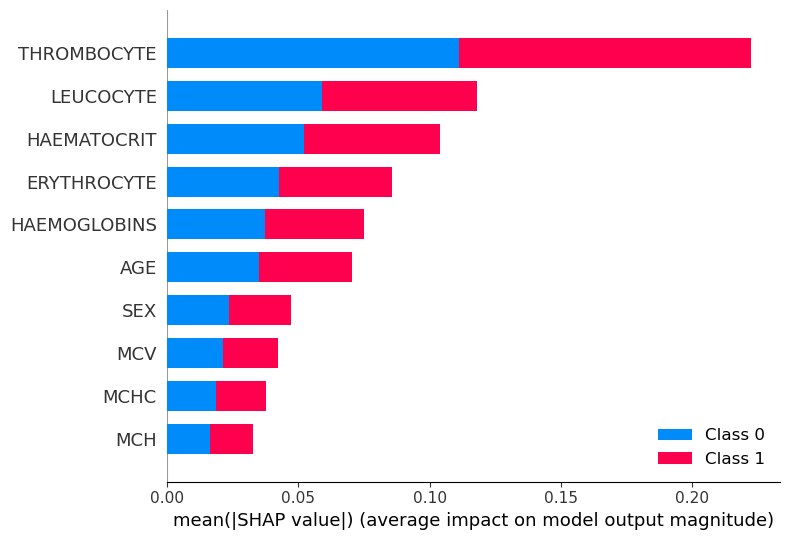

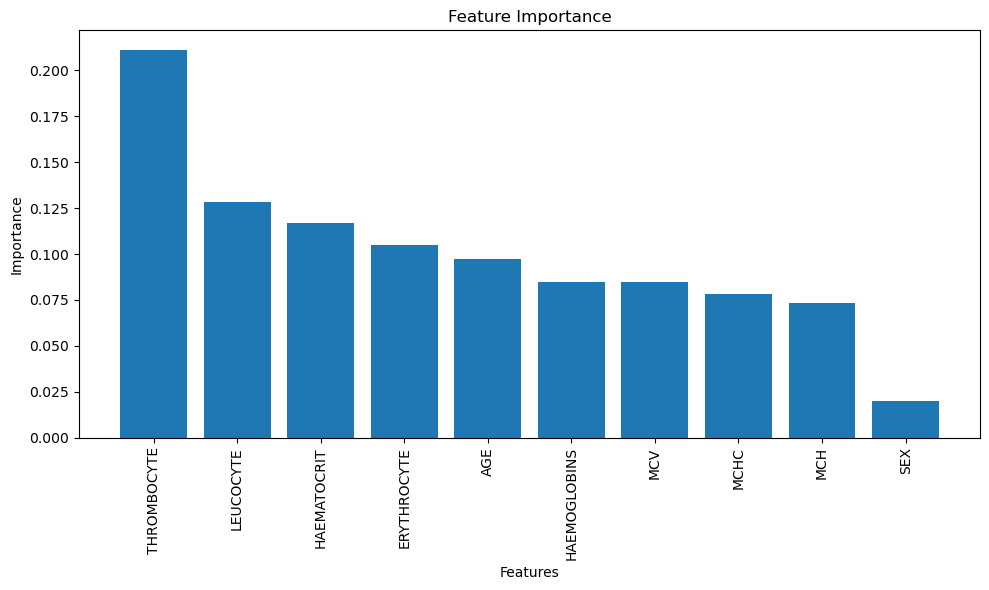

In [9]:
if __name__ == "__main__":
    main()